<a href="https://colab.research.google.com/github/IfeoluwaRuth/Seed-Dataset-Classification-and-Clustering-/blob/main/Wheat_seed_label_ML_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Algorithm for supervise classification dataset

# New section

Abstract

**Introduction **

In [1]:
# Import libraries for data manipulation and visualizations

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Information about the dataset

In [2]:
## import dataset
wheat_data = pd.read_csv("wheatData.csv")

# Print column names
print(wheat_data.columns)

# Print dimensions of the dataset
print(wheat_data.shape)


Index(['area', 'perimeter', 'compactness', 'length of kernel',
       'width of kernel', 'asymmetry coefficient', 'length of kernel groove',
       'wheatLabel'],
      dtype='object')
(210, 8)


In [3]:
# data info
wheat_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
 7   wheatLabel               210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.2+ KB


In [4]:
# data description
wheat_data.describe()


,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


** Data Cleaning **

In [5]:
# Group by 'wheatLabel' and count the occurrences of each label to ascertain the state of balancing in the dataset
wheat_label_count = wheat_data.groupby('wheatLabel').size().reset_index(name='count')
print(wheat_label_count)

  wheatLabel  count
0   Canadian     70
1       Kama     70
2      Rosa      70


In [7]:
# Check if there are any duplicate rows in the dataset
duplicates = wheat_data.duplicated()
print("Number of duplicate:", duplicates.sum())

Missing_V = wheat_data.isna().sum()
print("Sum of missing value: \n", Missing_V)

Number of duplicate: 0
Sum of missing value: 
 area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
wheatLabel                 0
dtype: int64


** Data Visualization **

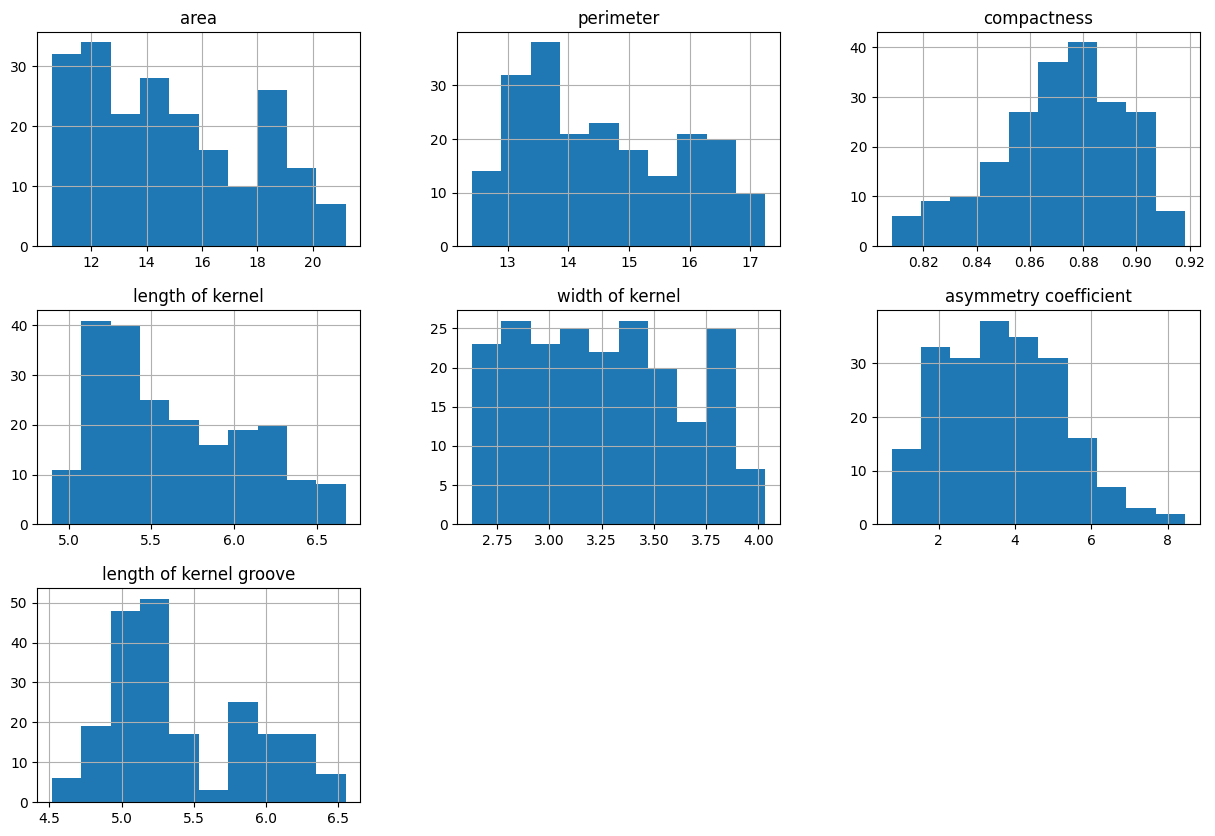

In [8]:
wheat_data.hist(figsize=(15,10))
plt.show()

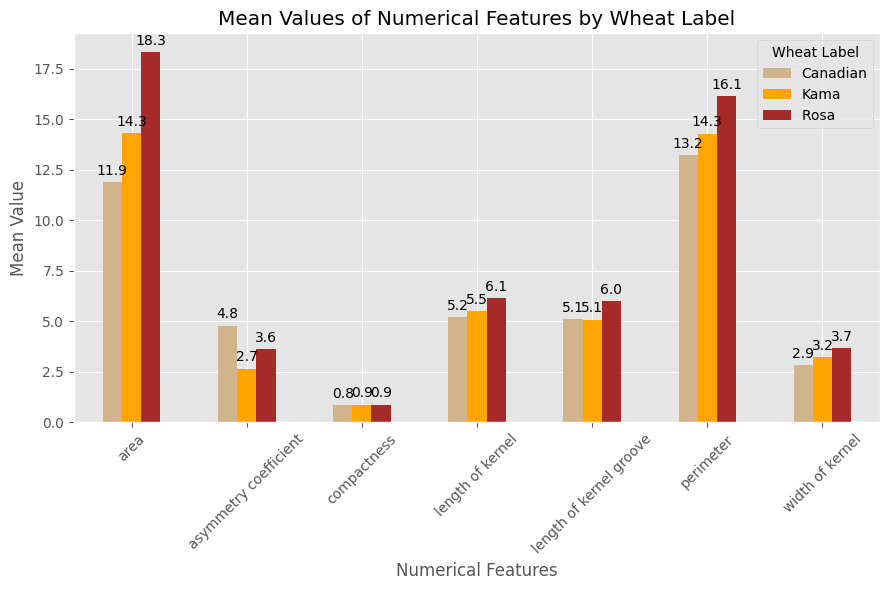

In [9]:
# Apply ggplot style
plt.style.use('ggplot')

# Create pivot table: Mean of numerical columns grouped by wheatLabel
pivot_t = wheat_data.pivot_table(
    values=['area', 'perimeter', 'compactness', 'length of kernel',
            'width of kernel', 'asymmetry coefficient',
            'length of kernel groove'],  # Numerical columns
    columns='wheatLabel',  # Group by wheatLabel
    aggfunc='mean',  # Aggregate function to calculate mean
    fill_value=0     # Fill missing combinations with 0
)

# Plot all the numeric variables in one plot
ax = pivot_t.plot(kind='bar', stacked=False, figsize=(9, 6),
                  color=['tan', 'orange', 'brown'])

# Add value labels on top of the bars
for container in ax.containers:
    # Round each value to 1 decimal place
    labels = [round(value, 1) for value in container.datavalues]

    # Add the rounded labels on top of the bars
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black', padding=3)

# Customize the plot
plt.title('Mean Values of Numerical Features by Wheat Label')
plt.xlabel('Numerical Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Wheat Label')

# Show the plot
plt.tight_layout()
# plt.savefig("wheat_label_mean_barplot_with_values.png")  # Uncomment to save the plot
plt.show()


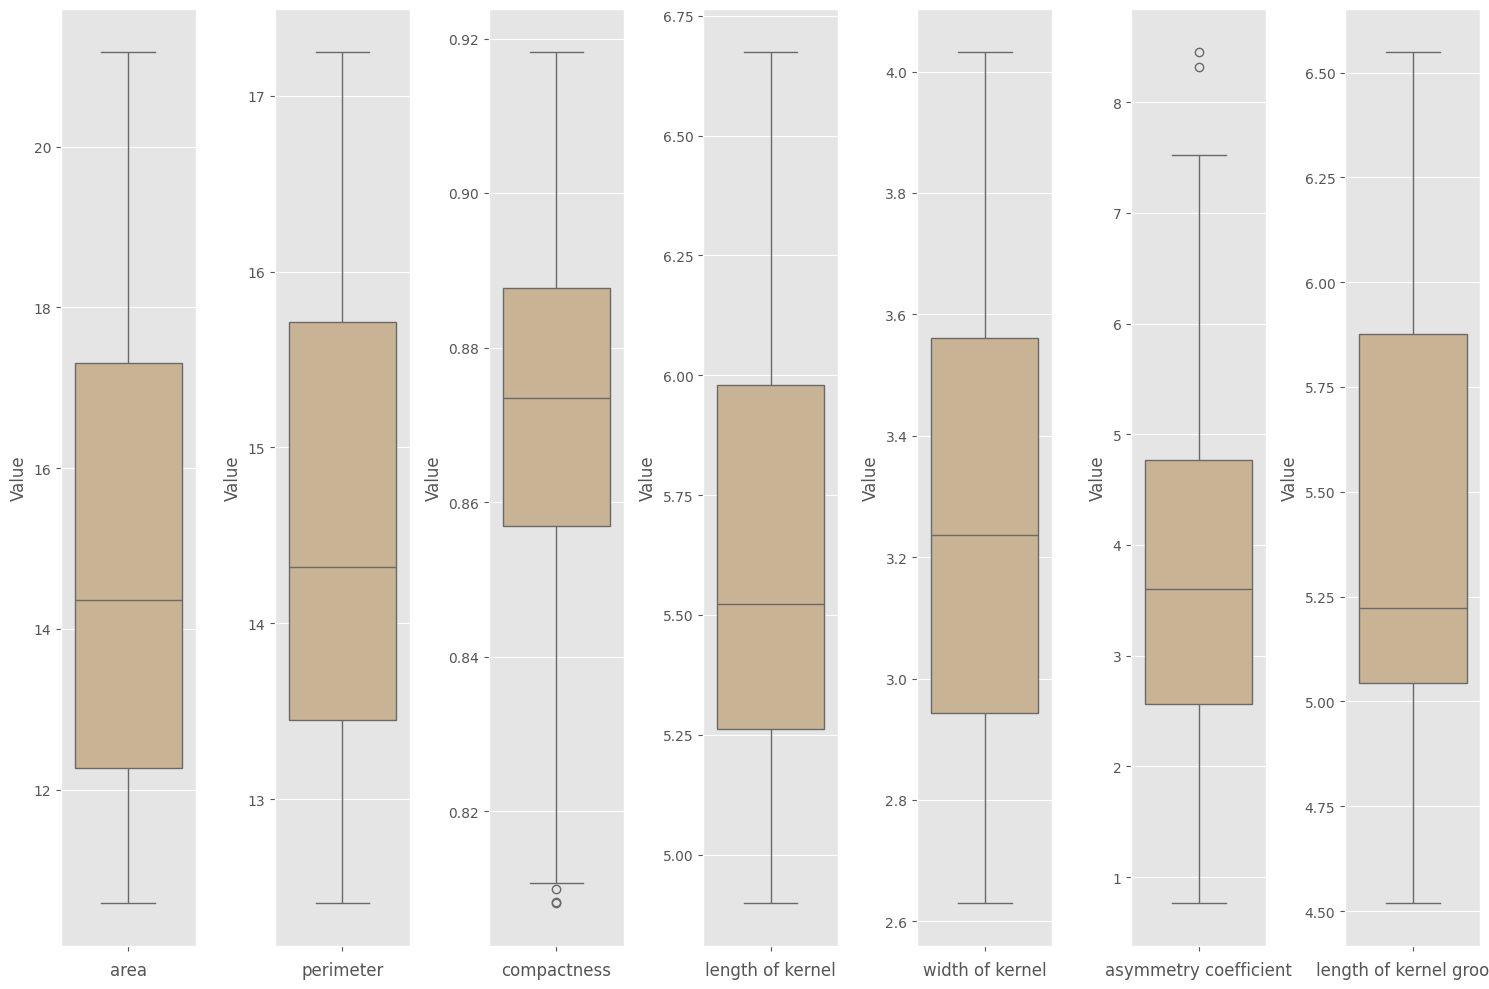

In [10]:
# List of the numerical features to plot
numerical_features = ['area', 'perimeter', 'compactness', 'length of kernel',
                      'width of kernel', 'asymmetry coefficient', 'length of kernel groove']

# Set up the matplotlib figure
fig, axes = plt.subplots(1, len(numerical_features), figsize=(15, 10))  # Create subplots for each feature

# Plot the boxplots for each numerical feature (on each axis)
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=wheat_data, y=feature, ax=axes[i], color="tan")

    # Customize each plot
   # axes[i].set_title(f'{feature}Boxplot')
    axes[i].set_ylabel('Value')
    axes[i].set_xlabel(feature)

# Adjust layout and show both plots
plt.tight_layout()
plt.show()

** Feature Engineering **

In [11]:
## importing libraries for thos section
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


 Creating additional variables

In [12]:
# groove_compactness_ratio = length of kernel groove / compactness
wheat_data['groove_compactness_ratio'] = wheat_data['length of kernel groove'] / wheat_data['compactness']


In [13]:
# #### length_width_ratio = length of kernel / width of kernel
wheat_data['length_width_ratio'] = wheat_data['length of kernel'] / wheat_data['width of kernel']

In [14]:
# Initialize KBinsDiscretizer
k_bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')  # 3 bins, equal width

# Fit and transform the asymetry property of the data
asymmetry_binned = k_bins.fit_transform(wheat_data['asymmetry coefficient'])

# Fit and transform the compactness of the data
asymmetry_binned = k_bins.fit_transform(wheat_data['compactness'])

print("Binned Data:")
print(X_binned)


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [15]:
# Initialize KBinsDiscretizer
k_bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')  # 3 bins, equal width

# Fit and transform the asymetry property of the data
# Reshape the input to a 2D array using .values.reshape(-1, 1)
asymmetry_binned = k_bins.fit_transform(wheat_data[['asymmetry coefficient']])

# Fit and transform the compactness of the data
# Reshape the input to a 2D array using .values.reshape(-1, 1)
asymmetry_binned = k_bins.fit_transform(wheat_data[['compactness']])

print("Binned Data:")
print(asymmetry_binned) # Changed X_binned to asymmetry_binned as X_binned is not defined

Binned Data:
[[1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [0.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [0.]
 [2.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [0.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [2.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [0.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [0.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0

In [16]:
## Spliting of dataset
X = wheat_data.drop('wheatLabel', axis=1)
y = wheat_data['wheatLabel']

In [17]:
### Feature encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [18]:
### Feature scaling of the independent variable
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_, y_encoded, test_size=0.2, random_state=42)


** Modeling **

Building predictive models using supervised Classification Learning Models of the sklearn libraries.

In [20]:
## Import libraries

from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [26]:
# Initialize classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(max_iter=1000, solver = 'sgd')
}
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report

# Display the evaluation results for each model
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print(f"Weighted F1-score: {result['weighted avg']['f1-score']:.2f}")
    print("\n")

Model: Logistic Regression
Accuracy: 0.90
Weighted F1-score: 0.90


Model: Decision Tree
Accuracy: 0.83
Weighted F1-score: 0.84


Model: Random Forest
Accuracy: 0.86
Weighted F1-score: 0.86


Model: KNN
Accuracy: 0.88
Weighted F1-score: 0.88


Model: SVM
Accuracy: 0.90
Weighted F1-score: 0.91


Model: Naive Bayes
Accuracy: 0.86
Weighted F1-score: 0.86


Model: Neural Network
Accuracy: 0.90
Weighted F1-score: 0.91


